# Load Data and Libraries

In [ ]:
pip install emoji

     |████████████████████████████████| 133kB 7.9MB/s 


In [ ]:
pip install allennlp==2.1.0 allennlp-models==2.1.0

     |████████████████████████████████| 593kB 8.1MB/s 
     |████████████████████████████████| 409kB 13.5MB/s 
     |████████████████████████████████| 1.2MB 27.4MB/s 
     |████████████████████████████████| 1.9MB 35.3MB/s 
     |████████████████████████████████| 266kB 40.3MB/s 
     |████████████████████████████████| 12.8MB 36.2MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 133kB 51.2MB/s 
     |████████████████████████████████| 122kB 55.1MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 901kB 44.6MB/s 
     |████████████████████████████████| 3.3MB 23.5MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
     |████████████████████████████████| 7.6MB 19.4MB/s 
  Created wheel for jsonnet: filename=jsonnet-0.17.0-cp37-cp37m-linux_x86_64.whl size=3388789 sha256=68c5b1c763a37a297bab5edf53ba19455bb3204ba5f8e473f163dba2904c76ef

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import emoji
import nltk
import spacy
import random
from gensim import corpora
import pickle
import gensim
nltk.download('words')
nltk.download('wordnet') 
words = set(nltk.corpus.words.words())
from nltk.corpus import wordnet as wn
spacy.load('en')
from spacy.lang.en import English
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
parser = English()
from allennlp.predictors.predictor import Predictor
import allennlp_models.tagging
predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/ner-elmo.2021-02-12.tar.gz")
import allennlp_models.tagging
sent_predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/basic_stanford_sentiment_treebank-2020.06.09.tar.gz")


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Plugin allennlp_models could not be loaded: No module named 'nltk.translate.meteor_score'


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


downloading: 100%|##########| 374434792/374434792 [00:08<00:00, 46116124.79B/s]
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")
Plugin allennlp_models could not be loaded: No module named 'nltk.translate.meteor_score'
downloading: 100%|##########| 37033341/37033341 [00:00<00:00, 42399073.42B/s]


In [ ]:
# load data

# users
benShapiro_t = pd.read_csv('/content/sample_data/new_benshapiro_tweets.csv')
charlieKirk_t = pd.read_csv('/content/sample_data/new_charliekirk11_tweets.csv')
ryanFournier_t = pd.read_csv('/content/sample_data/new_RyanAFournier_tweets.csv')
stinchfield1776_t = pd.read_csv('/content/sample_data/new_stinchfield1776_tweets.csv')
vicToensing_t = pd.read_csv('/content/sample_data/new_VicToensing_tweets.csv')

# control
techPlatform_t = pd.read_csv('/content/sample_data/new_TheTechPlatform_tweets.csv')

# Data Cleaning

In [ ]:
# remove all links, emojis, numbers, 'RT @.....'
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign

    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links

    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis

    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet

# users
benShapiro_t['text'] = benShapiro_t['text'].map(lambda x: cleaner(x))
benShapiro_t.to_csv('new_cleaned_benShapiro_t')

charlieKirk_t['text'] = charlieKirk_t['text'].map(lambda x: cleaner(x))
charlieKirk_t.to_csv('new_cleaned_charlieKirk_t')

ryanFournier_t['text'] = ryanFournier_t['text'].map(lambda x: cleaner(x))
ryanFournier_t.to_csv('new_cleaned_ryanFournier_t') 

stinchfield1776_t['text'] = stinchfield1776_t['text'].map(lambda x: cleaner(x))
stinchfield1776_t.to_csv('new_cleaned_stinchfield1776_t') 

vicToensing_t['text'] = vicToensing_t['text'].map(lambda x: cleaner(x))
vicToensing_t.to_csv('new_cleaned_vicToensing_t')

#control
techPlatform_t['text'] = techPlatform_t['text'].map(lambda x: cleaner(x))
techPlatform_t.to_csv('new_cleaned_techPlatform_t')

In [ ]:
# load new cleaned data

# users
new_cleaned_benShapiro_t = pd.read_csv('/content/sample_data/new_cleaned_benShapiro_t.csv')
new_cleaned_benShapiro_t = new_cleaned_benShapiro_t.dropna()

new_cleaned_charlieKirk_t = pd.read_csv('/content/sample_data/new_cleaned_charlieKirk_t.csv')
new_cleaned_charlieKirk_t = new_cleaned_charlieKirk_t.dropna()

new_cleaned_ryanFournier_t = pd.read_csv('/content/sample_data/new_cleaned_ryanFournier_t.csv')
new_cleaned_ryanFournier_t = new_cleaned_ryanFournier_t.dropna()

new_cleaned_stinchfield1776_t = pd.read_csv('/content/sample_data/new_cleaned_stinchfield1776_t.csv')
new_cleaned_stinchfield1776_t = new_cleaned_stinchfield1776_t.dropna()

new_cleaned_vicToensing_t = pd.read_csv('/content/sample_data/new_cleaned_vicToensing_t.csv')
new_cleaned_vicToensing_t = new_cleaned_vicToensing_t.dropna()

# control
new_cleaned_techPlatform_t = pd.read_csv('/content/sample_data/new_cleaned_techPlatform_t.csv')
new_cleaned_techPlatform_t = new_cleaned_techPlatform_t.dropna()

In [ ]:
# only tweets for each user

benShapiro_tweets = new_cleaned_benShapiro_t['text']
benShapiro_tweets.to_csv('benShapiro_tweets')

charlieKirk_tweets = new_cleaned_charlieKirk_t['text']
charlieKirk_tweets.to_csv('charlieKirk_tweets')

ryanFournier_tweets = new_cleaned_ryanFournier_t['text']
ryanFournier_tweets.to_csv('ryanFournier_tweets')

stinchfield1776_tweets = new_cleaned_stinchfield1776_t['text']
stinchfield1776_tweets.to_csv('stinchfield1776_tweets')

vicToensing_tweets = new_cleaned_vicToensing_t['text']
vicToensing_tweets.to_csv('vicToensing_tweets')

# control
techPlatform_tweets = new_cleaned_techPlatform_t['text']
techPlatform_tweets.to_csv('techPlatform_tweets')


# Analysis

### Find Subject of Tweets (Topic Modelling with NLTK and Gensim)

#### Function To Get Tokens of Tweets

In [ ]:
# return a list of tokens 
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [ ]:
# get root word
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [ ]:
# to filter out stop words
en_stop = set(nltk.corpus.stopwords.words('english'))

In [ ]:
# put above function together for overall function
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

#### Function To Get Topic of Tweets

In [ ]:
# return topic for tweets
def get_topic(tweets_file):
  """ used with the path of a file with only tweets 
  and returns the topic for that file"""

  # get tokens for each tweet
  text_data = []
  with open(tweets_file) as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        if random.random() > .99:
            text_data.append(tokens)
  
  # create dict from data, convert to bag-of-words corpus and save both for future use
  dictionary = corpora.Dictionary(text_data)
  corpus = [dictionary.doc2bow(text) for text in text_data]
  pickle.dump(corpus, open('corpus.pkl', 'wb'))
  dictionary.save('dictionary.gensim')

  # find 1 topic
  ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 1, id2word=dictionary, passes=15)
  ldamodel.save('model3.gensim')
  topics = ldamodel.print_topics(num_words=1)

  # get string topic
  new_topic = topics[0][1].split('"',1)[-1]
  new_topic = new_topic.rstrip(new_topic[-1])
  return new_topic




### Use Allen NLP for Sentimental Analysis

In [ ]:
# make function for allen nlp use
def get_sentiment_timeline(tweets, topic):
  """ uses tweets of that user combined with the topic and return timeline
  of sentiments for topic-related tweets"""

  # filter tweets based on topic
  
  filtered_tweets = list(tweets[tweets['text'].str.contains(topic)])

  # get sentiment list
  sentiment_list = []
  for tweet in filtered_tweets:
    sentiment_list.append(sent_predictor.predict(tweet)['logits'])

  # get parsed lsentiment list to use for plot
  parsed_sent = []
  for items in sentiment_list:
    parsed_sent.append(items[0])

  # plot tweets and thier sentiment in chronological order
  len_x = range(len(parsed_sent))
  plt.figure(figsize=(16,16))
  plt.plot(range(len(parsed_sent)), parsed_sent)
  plt.axhline(y=0,color = 'r')
  plt.yticks([-4,-3,-2,-1,0,1,2,3,4])
  plt.show()

# User Analysis

## Ben Shapiro

In [ ]:
benShapiro_topic = get_topic('/content/sample_data/benShapiro_tweets.csv')
print("Topic of Ben Shapiro's Tweets: ", benShapiro_topic)

Topic of Ben Shapiro's Tweets:  540,"-


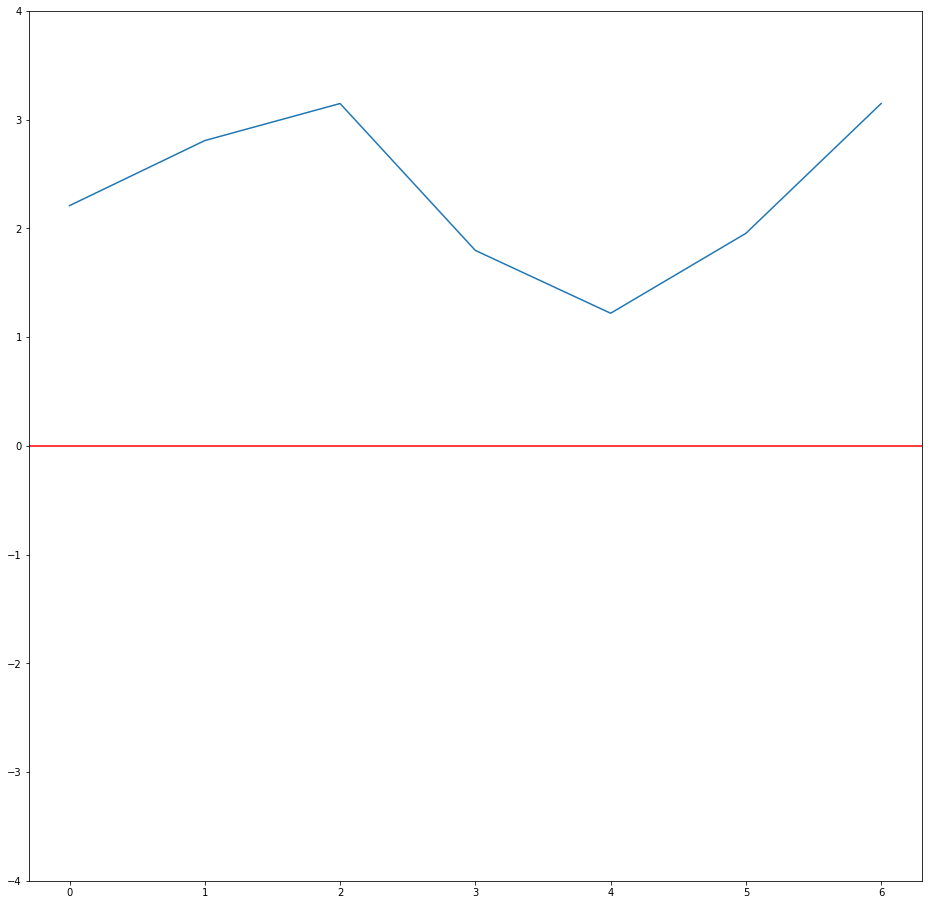

In [ ]:
# get string topic
get_sentiment_timeline(new_cleaned_benShapiro_t, benShapiro_topic)

## Charlie Kirk

In [ ]:
charlieKirk_topic = get_topic('/content/sample_data/charlieKirk_tweets.csv')
print("Topic of Charlie Kirk's Tweets: ", charlieKirk_topic)

ValueError: ignored

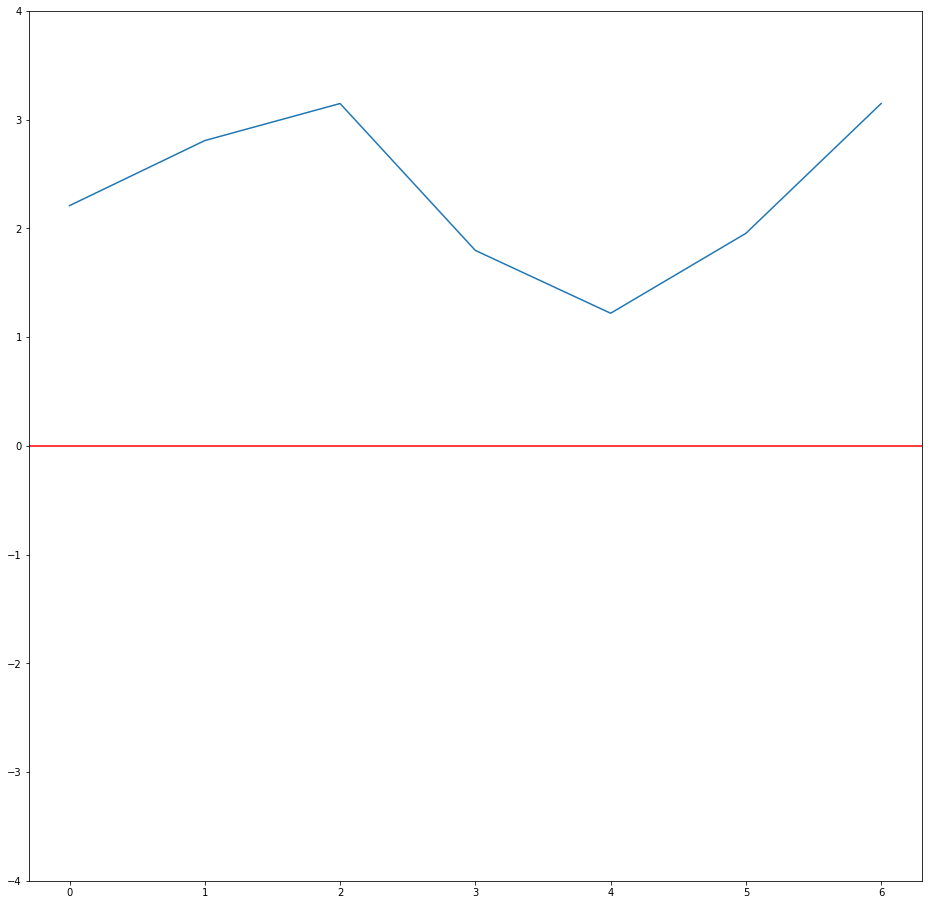

In [ ]:
get_sentiment_timeline(new_cleaned_charlieKirk_t, charlieKirk_topic)

## Ryan Fournier

In [ ]:
ryanFounier_topic = get_topic('/content/sample_data/ryanFournier_tweets.csv')
print("Topic of Ryan Fournier's Tweets: ", ryanFounier_topic)

Topic of Ryan Fournier's Tweets:  1065,he


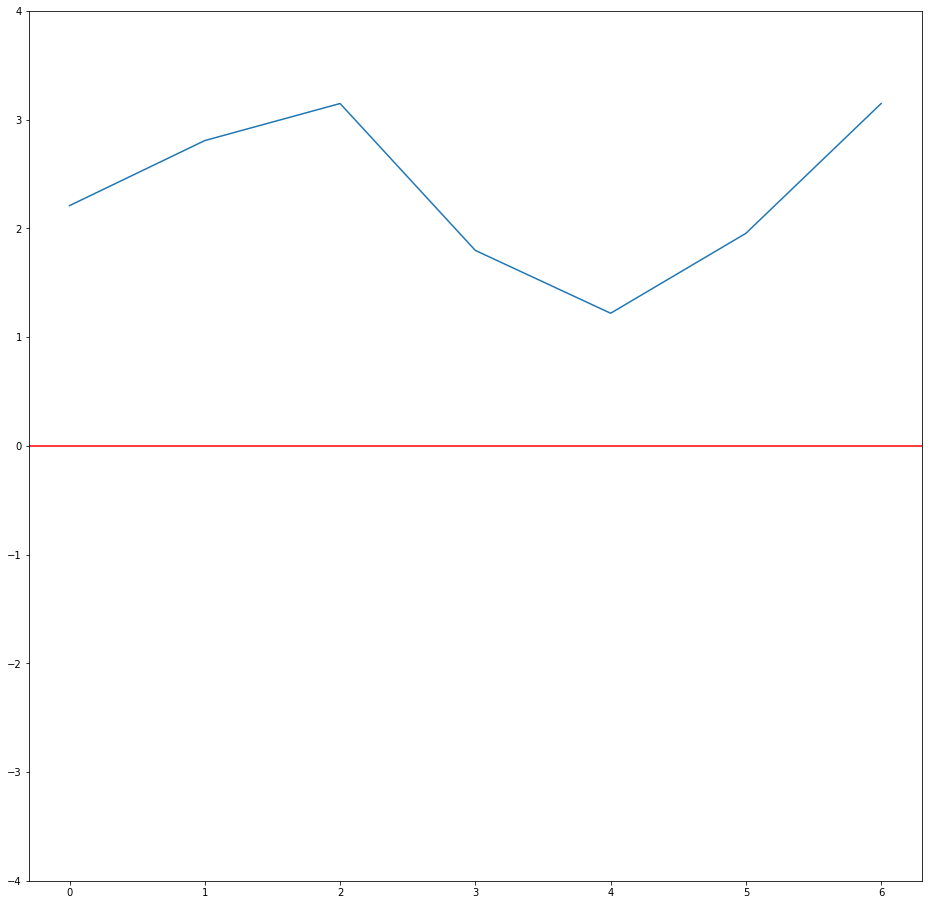

In [ ]:
get_sentiment_timeline(new_cleaned_ryanFournier_t, ryanFounier_topic)

## Stinchfield 1776

In [ ]:
stinchfield1776_topic = get_topic('/content/sample_data/stinchfield1776_tweets.csv')
print("Topic of Stinchfield 1776's Tweets: ", stinchfield1776_topic)

Topic of Stinchfield 1776's Tweets:  never


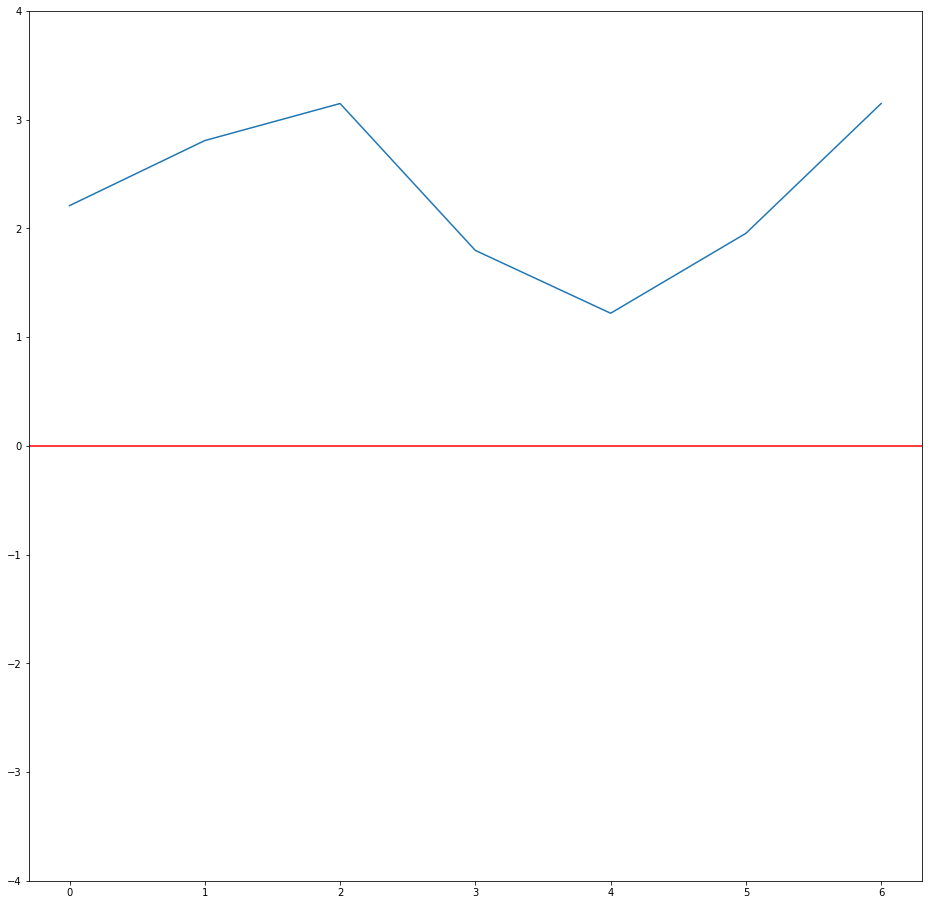

In [ ]:
get_sentiment_timeline(new_cleaned_stinchfield1776_t, stinchfield1776_topic)

## Vic Toensing

In [ ]:
vicToensing_topic = get_topic('/content/sample_data/vicToensing_tweets.csv')
print("Topic of Vic Toensing's Tweets: ", vicToensing_topic)

Topic of Vic Toensing's Tweets:  584,watch


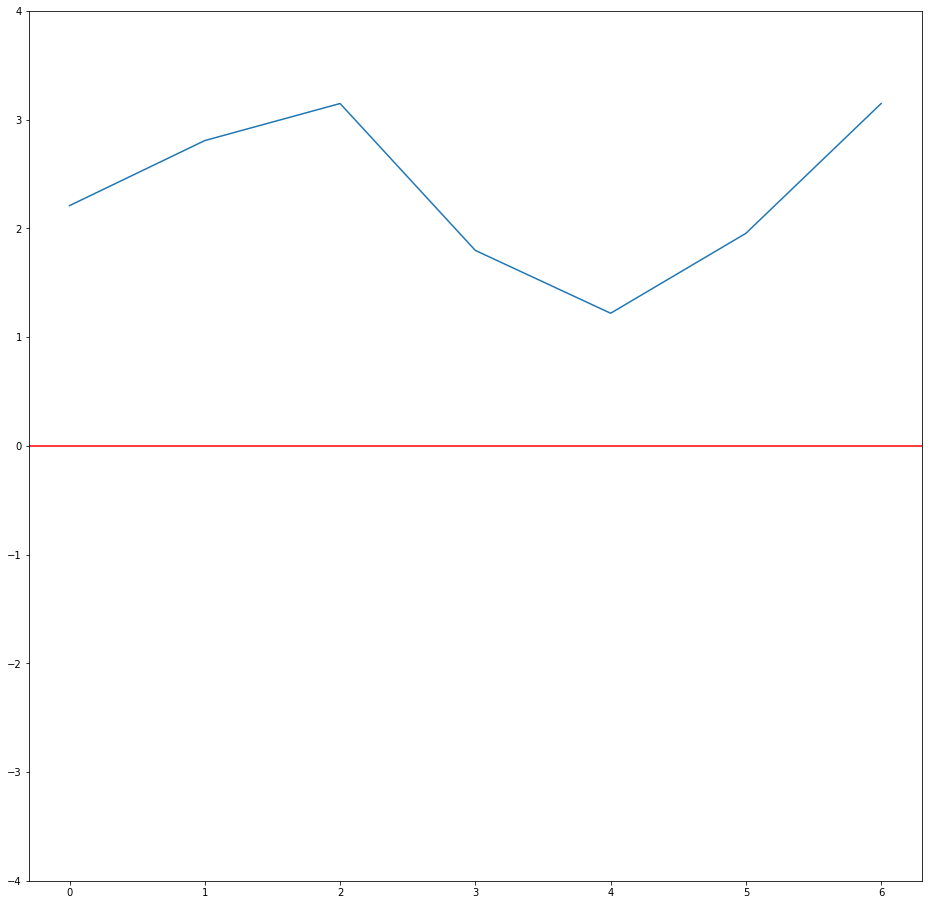

In [ ]:
get_sentiment_timeline(new_cleaned_vicToensing_t, vicToensing_topic)

## The Tech Platform

In [ ]:
techPlatform_topic = get_topic('/content/sample_data/techPlatform_tweets.csv')
print("Topic of The Tech Platform's Tweets: ", techPlatform_topic)

Topic of The Tech Platform's Tweets:  support


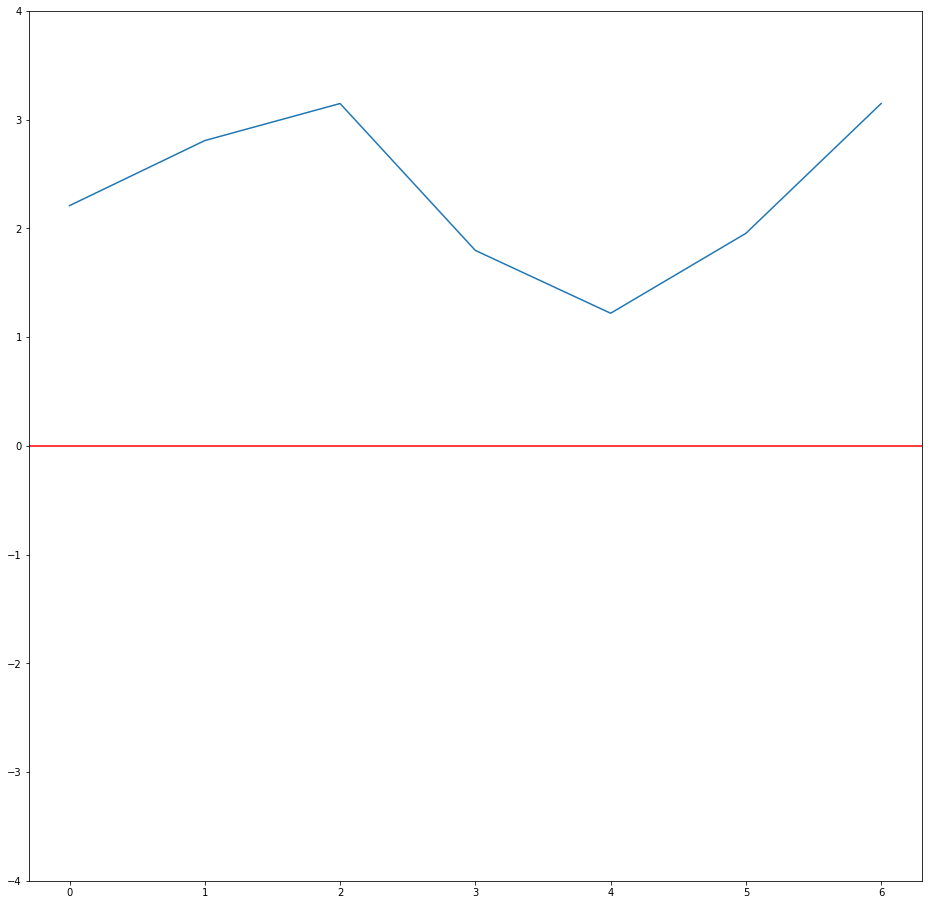

In [ ]:
get_sentiment_timeline(new_cleaned_techPlatform_t, techPlatform_topic)